# PHQ615 : Calculs 

## Calcul de la connexion affine et du tenseur de Riemann à partir de la métrique

## 2-sphère

Calculs de la connexion et du tenseur de Riemann pour la 2-sphère en coordonnées sphériques $\theta$ et $\phi$.

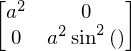

In [1]:
from sympy import *
from sympy import Array

init_printing()

a, θ, ϕ = symbols('a θ ϕ')
gd = Array([[a**2, 0],[0, a**2*sin(θ)**2]])
coords = Array([θ, ϕ])
gu = Array([[1/a**2, 0],[0, 1/(a**2*sin(θ)**2)]])
gd

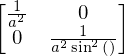

In [2]:
gu

In [3]:
tensorcontraction(tensorproduct(gd, gu), (1,2))

⎡1  0⎤
⎢    ⎥
⎣0  1⎦

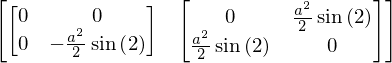

In [3]:
# connexion affine 'covariante'
dg = derive_by_array(gd, coords)
gammad = (permutedims(dg,(2,0,1)) + permutedims(dg,(2,1,0))-dg)/2
simplify(gammad)

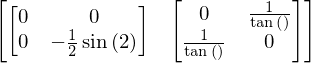

In [4]:
# connexion affine
Γ = tensorcontraction(tensorproduct(gu, gammad), (1,2))
simplify(Γ)

## Calcul du tenseur de Riemann

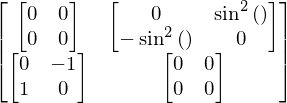

In [5]:
# tenseur de Riemann
R1 = derive_by_array(Γ, coords)
C = tensorcontraction(tensorproduct(Γ, Γ), (0,4))
R = permutedims(R1,(1,2,0,3)) - permutedims(R1,(1,2,3,0)) + permutedims(C,(2,0,3,1)) - permutedims(C,(2,0,1,3))
R = simplify(R)
R

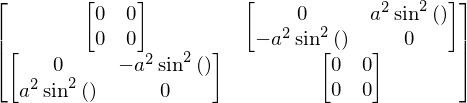

In [6]:
# tenseur de Riemann covariant
Rcov =  tensorcontraction(tensorproduct(gd, R), (1,2))
Rcov

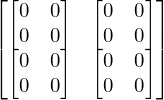

In [7]:
# vérification des propriétés de symétrie de Rcov
A = Rcov + permutedims(Rcov,(0,2,3,1)) + permutedims(Rcov,(0,3,1,2))
simplify(A)

In [12]:
# vérification de la nullité de la contraction des deux premiers indices
tensorcontraction(R, (0,1))

⎡0  0⎤
⎢    ⎥
⎣0  0⎦

In [13]:
# tenseur de Ricci
Ricci = tensorcontraction(R, (0,2))
Ricci

⎡1     0   ⎤
⎢          ⎥
⎢      2   ⎥
⎣0  sin (θ)⎦

In [14]:
# Courbure scalaire
Rm = tensorcontraction(tensorproduct(gu,Ricci), (1,2))
Rscal = tensorcontraction(Rm, (0,1))
simplify(Rscal)

In [15]:
# tenseur d'Einstein
E = Ricci - gd*Rscal/2
E = simplify(E)
E

⎡0  0⎤
⎢    ⎥
⎣0  0⎦

In [24]:
def dcov(A, coords, pos):
    rank = len(pos)
    D1 = derive_by_array(A, coords)
    for i in range(rank):
        perm = list(range(rank+1))
        perm[i+1] = 0
        perm[0] = 1
        for j in range(1, i+1):
            perm[j] += 1
        if pos[i] is 0:
            print('indice ', i, ' est covariant, perm = ', tuple(perm))
            B = tensorcontraction(tensorproduct(Γ, A), (0, i+3))
            D1 -= permutedims(B, perm)
        else:
            print('indice ', i, ' est contravariant, perm = ', tuple(perm))
            B = tensorcontraction(tensorproduct(Γ, A), (1, i+3))
            D1 += permutedims(B, perm)
    return D1


In [27]:
simplify(dcov(gd, coords, (0,0)))

indice  0  est covariant, perm =  (1, 0, 2)
indice  1  est covariant, perm =  (1, 2, 0)


⎡⎡0  0⎤  ⎡0  0⎤⎤
⎢⎢    ⎥  ⎢    ⎥⎥
⎣⎣0  0⎦  ⎣0  0⎦⎦

In [25]:
# identité de Bianchi

B = dcov(Rcov, coords, (0,0,0,0))
permutedims(B, (1,2,3,4,0))+permutedims(B, (1,2,0,3,4))+permutedims(B, (1,2,4,0,3))

indice  0  est covariant, perm =  (1, 0, 2, 3, 4)
indice  1  est covariant, perm =  (1, 2, 0, 3, 4)
indice  2  est covariant, perm =  (1, 2, 3, 0, 4)
indice  3  est covariant, perm =  (1, 2, 3, 4, 0)


⎡⎡⎡0  0⎤  ⎡0  0⎤⎤  ⎡⎡0  0⎤  ⎡0  0⎤⎤⎤
⎢⎢⎢    ⎥  ⎢    ⎥⎥  ⎢⎢    ⎥  ⎢    ⎥⎥⎥
⎢⎢⎣0  0⎦  ⎣0  0⎦⎥  ⎢⎣0  0⎦  ⎣0  0⎦⎥⎥
⎢⎢              ⎥  ⎢              ⎥⎥
⎢⎢⎡0  0⎤  ⎡0  0⎤⎥  ⎢⎡0  0⎤  ⎡0  0⎤⎥⎥
⎢⎢⎢    ⎥  ⎢    ⎥⎥  ⎢⎢    ⎥  ⎢    ⎥⎥⎥
⎣⎣⎣0  0⎦  ⎣0  0⎦⎦  ⎣⎣0  0⎦  ⎣0  0⎦⎦⎦